# Import required libraries

In [2]:
import pandas as pd#
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in outputs
pd.set_option('display.max_columns', None)


In [5]:
# Load Public Sector Banks
public_df = pd.read_excel("Public Sector Bank_NPA_Data.xlsx")

# Load Private Sector Banks
private_df = pd.read_excel("Private Sector Bank Analysis.xlsx")

# Add Bank Type column to each
public_df['Bank Type'] = 'Public'
private_df['Bank Type'] = 'Private'

# Combine both datasets
df = pd.concat([public_df, private_df], ignore_index=True)

# View sample data
df.head()


,Bank name,Year,Gross NPA,Gross NPA %,ROA,ROE,NIM,CAR,Size of Bank,LDR,OER,NPM,Bank Type
0,SBI,2015.0,56725.34,6.00,0.63,10.20,2.68,12.00,2048079.80,82.447486,21.748428,8.59,Public
1,SBI,2016.0,98172.80,5.00,0.42,6.89,2.42,13.12,2357617.54,84.571644,21.779384,6.06,Public
2,SBI,2017.0,112342.99,3.97,0.38,6.69,2.28,13.11,2705966.30,76.834689,22.027184,5.97,Public
3,SBI,2018.0,223427.46,2.78,-0.18,-3.37,2.16,12.60,3454752.00,71.494263,22.611637,-2.96,Public
4,SBI,2019.0,172753.60,2.24,0.02,0.39,2.40,12.72,3680914.25,75.080285,24.920204,0.35,Public


In [7]:
# Check for null values
print(df.isnull().sum())

# Check datatypes
print(df.dtypes)

# Optional: Fill or drop missing data
df = df.dropna()  # or use df.fillna(method='ffill')


Bank name       12
Year            12
Gross NPA       12
Gross NPA %     12
ROA             12
ROE             12
NIM             12
CAR             12
Size of Bank    12
LDR             12
OER             12
NPM             12
Bank Type        0
dtype: int64
Bank name        object
Year            float64
Gross NPA       float64
Gross NPA %     float64
ROA             float64
ROE             float64
NIM             float64
CAR             float64
Size of Bank    float64
LDR             float64
OER             float64
NPM             float64
Bank Type        object
dtype: object


In [9]:
# Summary by Bank Type
print(df.groupby('Bank Type').describe())

# Mean of all features grouped by Public vs Private
df.groupby('Bank Type').mean(numeric_only=True)


            Year                                                            \
           count    mean       std     min     25%     50%     75%     max   
Bank Type                                                                    
Private    120.0  2019.5  2.884324  2015.0  2017.0  2019.5  2022.0  2024.0   
Public     120.0  2019.5  2.884324  2015.0  2017.0  2019.5  2022.0  2024.0   

          Gross NPA                                                  \
              count          mean           std     min         25%   
Bank Type                                                             
Private       120.0  13105.733667  30026.868958  111.23   1539.5425   
Public        120.0  39366.186500  36319.918497  333.98  12811.1900   

                                            Gross NPA %                       \
                 50%         75%        max       count       mean       std   
Bank Type                                                                      
Private     3

,Year,Gross NPA,Gross NPA %,ROA,ROE,NIM,CAR,Size of Bank,LDR,OER,NPM
Bank Type,,,,,,,,,,,
Private,2019.5,13105.733667,4.666667,0.799000,6.722500,4.671583,15.752333,437674.886833,82.718981,24.494788,10.837583
Public,2019.5,39366.186500,10.176917,-0.057167,-2.417083,2.250500,13.304333,828777.513833,67.430164,21.238732,-0.491667


Text(0.5, 1.0, 'Correlation Between Variables')

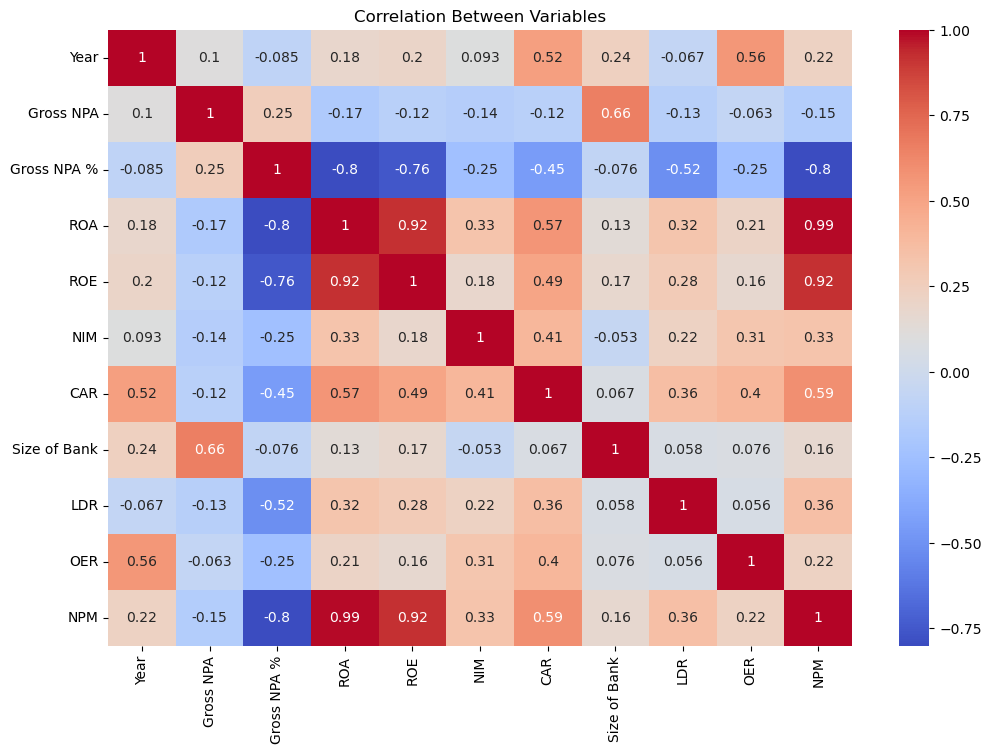

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")



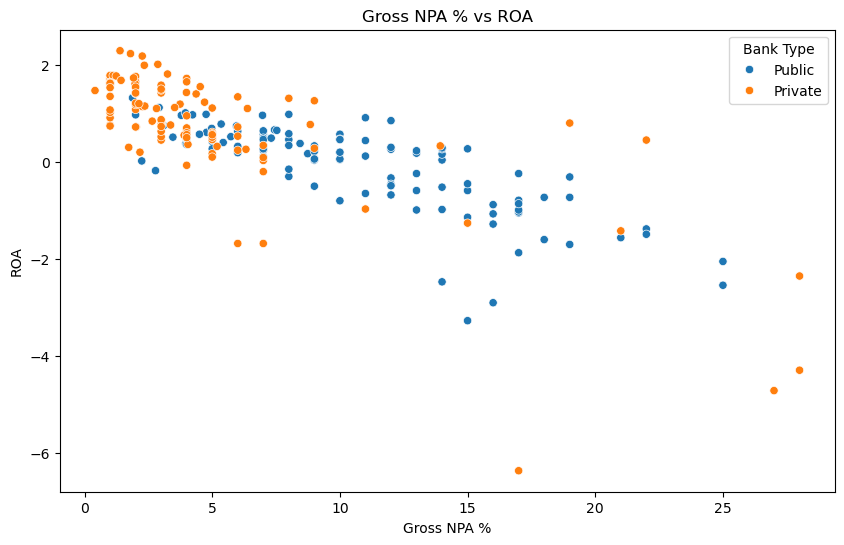

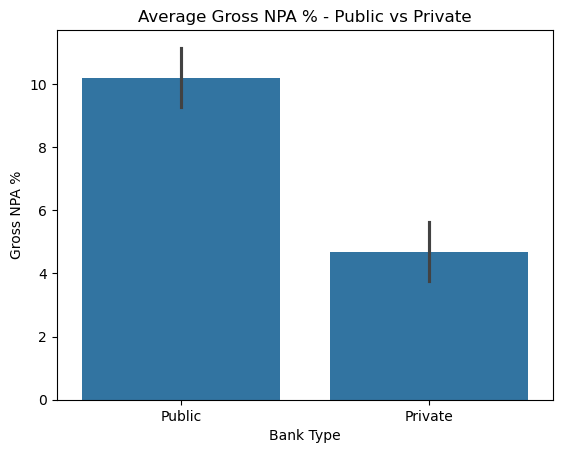

In [15]:
# Gross NPA % vs ROA comparison
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Gross NPA %', y='ROA', hue='Bank Type')
plt.title('Gross NPA % vs ROA')
plt.show()

# Compare mean NPA % for both sectors
sns.barplot(data=df, x='Bank Type', y='Gross NPA %')
plt.title("Average Gross NPA % - Public vs Private")
plt.show()


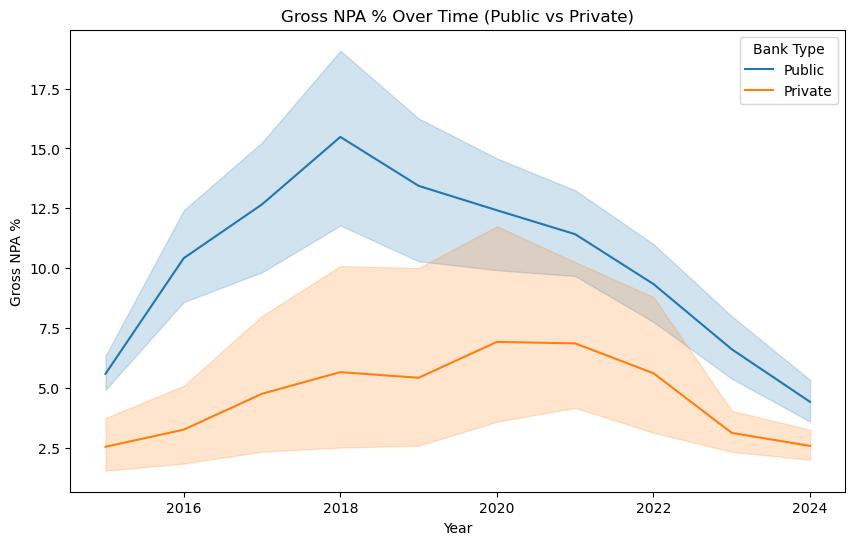

In [17]:
# Lineplot of Gross NPA % over years by Bank Type
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Gross NPA %', hue='Bank Type', estimator='mean')
plt.title("Gross NPA % Over Time (Public vs Private)")
plt.show()


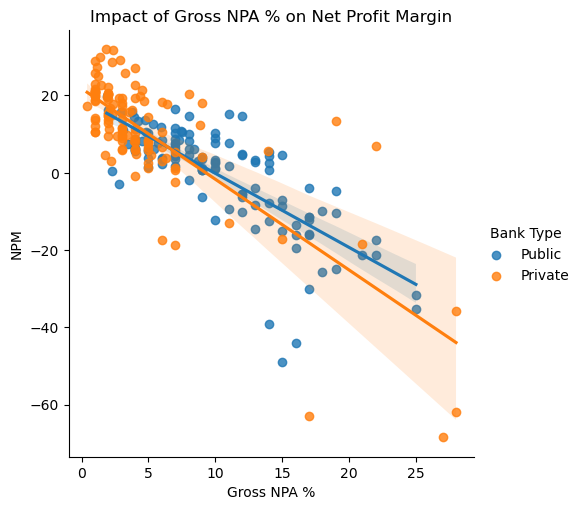

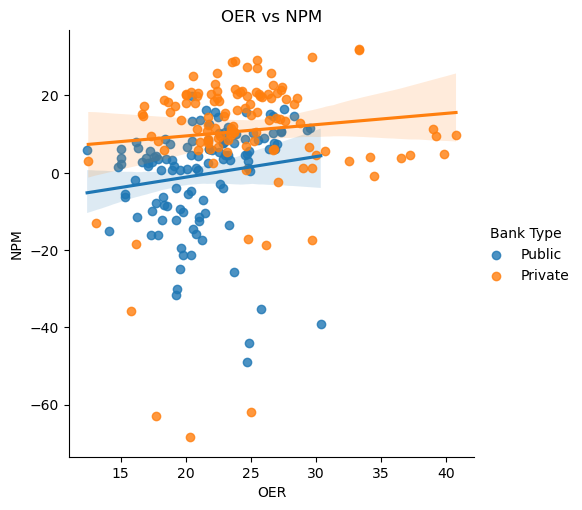

In [19]:
# Check how NPA % impacts NPM
sns.lmplot(data=df, x='Gross NPA %', y='NPM', hue='Bank Type')
plt.title("Impact of Gross NPA % on Net Profit Margin")
plt.show()

# Impact of Operating Efficiency Ratio (OER) on NPM
sns.lmplot(data=df, x='OER', y='NPM', hue='Bank Type')
plt.title("OER vs NPM")
plt.show()


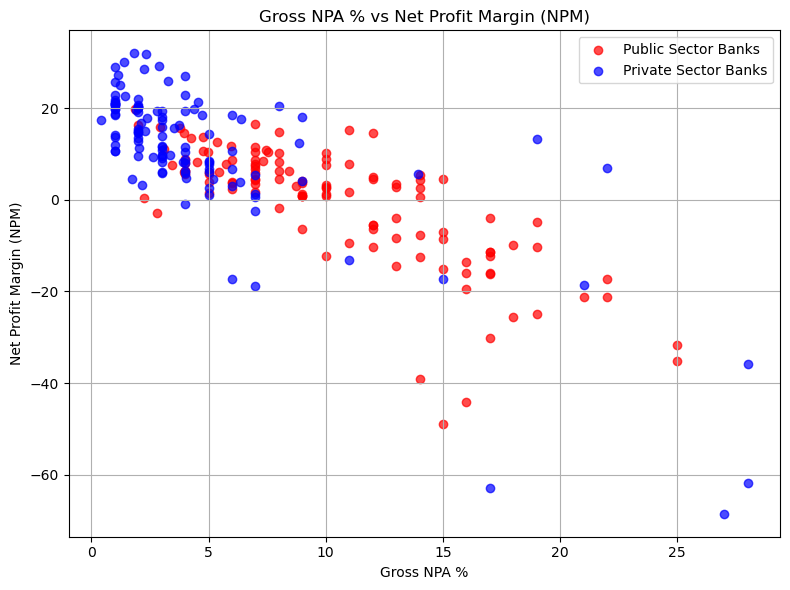

In [23]:
import matplotlib.pyplot as plt

# Filter Public and Private banks separately
public = df[df['Bank Type'] == 'Public']
private = df[df['Bank Type'] == 'Private']

plt.figure(figsize=(8,6))
plt.scatter(public['Gross NPA %'], public['NPM'], color='red', label='Public Sector Banks', alpha=0.7)
plt.scatter(private['Gross NPA %'], private['NPM'], color='blue', label='Private Sector Banks', alpha=0.7)

plt.title('Gross NPA % vs Net Profit Margin (NPM)')
plt.xlabel('Gross NPA %')
plt.ylabel('Net Profit Margin (NPM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


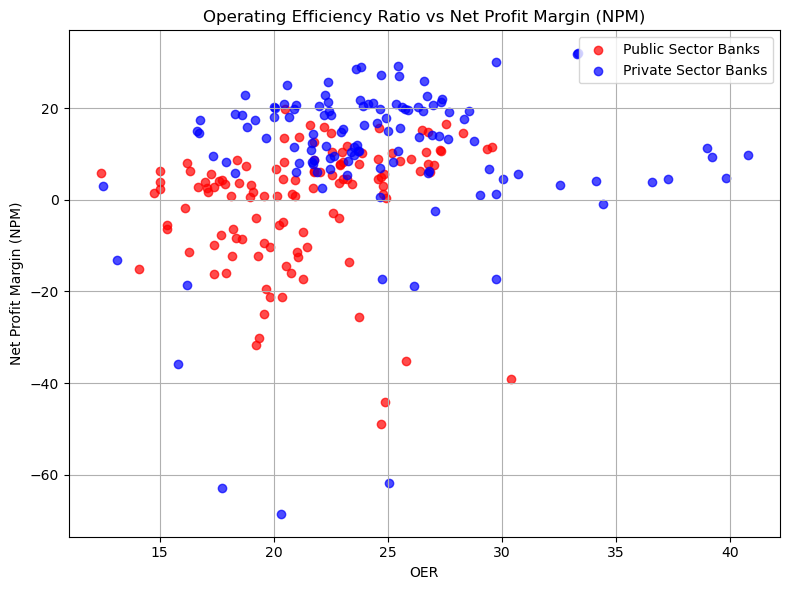

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(public['OER'], public['NPM'], color='red', label='Public Sector Banks', alpha=0.7)
plt.scatter(private['OER'], private['NPM'], color='blue', label='Private Sector Banks', alpha=0.7)

plt.title('Operating Efficiency Ratio vs Net Profit Margin (NPM)')
plt.xlabel('OER')
plt.ylabel('Net Profit Margin (NPM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


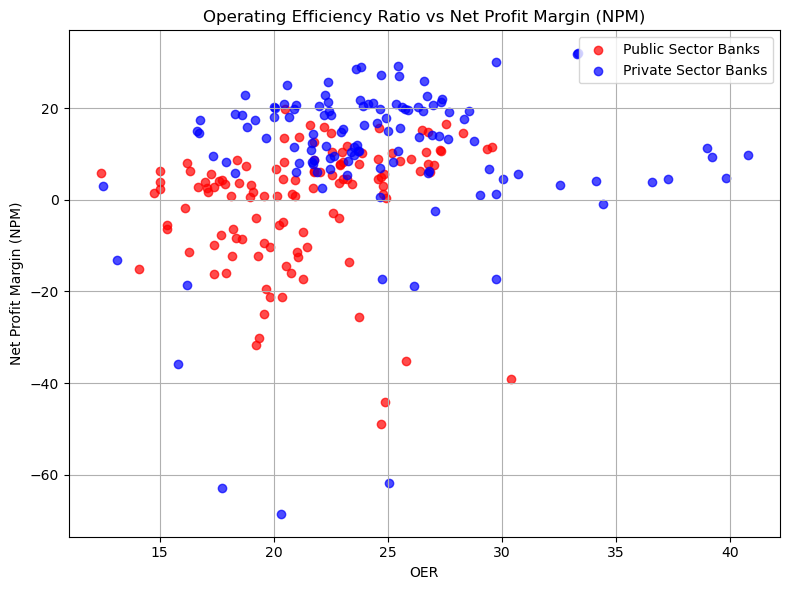

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(public['OER'], public['NPM'], color='red', label='Public Sector Banks', alpha=0.7)
plt.scatter(private['OER'], private['NPM'], color='blue', label='Private Sector Banks', alpha=0.7)

plt.title('Operating Efficiency Ratio vs Net Profit Margin (NPM)')
plt.xlabel('OER')
plt.ylabel('Net Profit Margin (NPM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


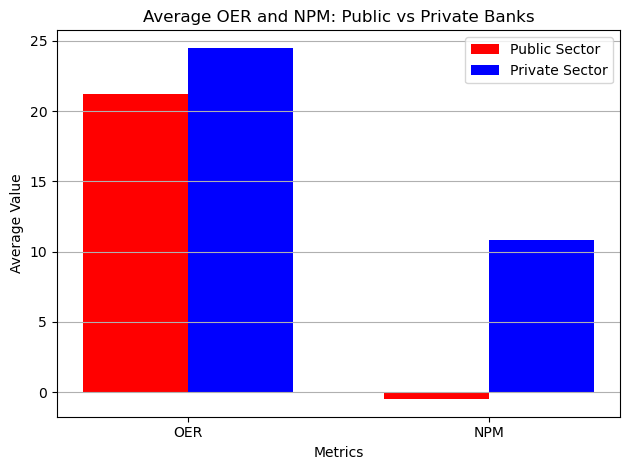

In [29]:
import matplotlib.pyplot as plt

# Calculate average OER and NPM
public_avg_oer = public['OER'].mean()
public_avg_npm = public['NPM'].mean()
private_avg_oer = private['OER'].mean()
private_avg_npm = private['NPM'].mean()

# Categories and values
categories = ['OER', 'NPM']
public_values = [public_avg_oer, public_avg_npm]
private_values = [private_avg_oer, private_avg_npm]

# Bar width and positions
x = range(len(categories))
bar_width = 0.35

# Plot bars
plt.bar([i - bar_width/2 for i in x], public_values, width=bar_width, label='Public Sector', color='red')
plt.bar([i + bar_width/2 for i in x], private_values, width=bar_width, label='Private Sector', color='blue')

# Labels and title
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('Average OER and NPM: Public vs Private Banks')
plt.xticks(x, categories)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
